In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False)

#train_data = pd.read_csv("../input/train.csv") #reading the csv files using pandas
#test_data = pd.read_csv("../input/test.csv")

In [3]:
X[0,:].shape

(784,)

9


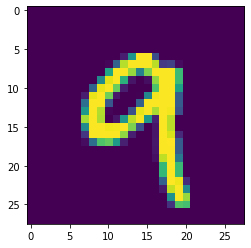

In [4]:
plt.imshow(X[110,:].reshape(28,28))
print(y[110])

In [5]:
np.unique(X[0,:])

array([  0.,   1.,   2.,   3.,   9.,  11.,  14.,  16.,  18.,  23.,  24.,
        25.,  26.,  27.,  30.,  35.,  36.,  39.,  43.,  45.,  46.,  49.,
        55.,  56.,  64.,  66.,  70.,  78.,  80.,  81.,  82.,  90.,  93.,
        94., 107., 108., 114., 119., 126., 127., 130., 132., 133., 135.,
       136., 139., 148., 150., 154., 156., 160., 166., 170., 171., 172.,
       175., 182., 183., 186., 187., 190., 195., 198., 201., 205., 207.,
       212., 213., 219., 221., 225., 226., 229., 238., 240., 241., 242.,
       244., 247., 249., 250., 251., 252., 253., 255.])

In [6]:
X = X/255.0

### Q1
whiten the data using function from sklearn.preprocessing
whiten is mean 0 and var 1

In [7]:
from sklearn.preprocessing import scale
X = scale(X)

print(np.mean(X))

9.699198036888353e-19


In [9]:
squarer = lambda t: int(t)
vfunc = np.vectorize(squarer)
y = vfunc(y)

In [10]:
y

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [11]:
#Fill in

def train_and_test_split(X,y):
    #divide the data into train and test set without using sklearn - pick data randomly
    tr_index = []
    te_index = []
    for i in range(10):
        perm = np.random.permutation(np.where(y==i)[0])
        p = int(np.round(0.7*len(perm)))
        tr_index.extend(perm[:p])
        te_index.extend(perm[p:])

    tr_index = np.random.permutation(tr_index)
    te_index = np.random.permutation(te_index)
    X_train = X[tr_index,:]
    y_train = y[tr_index]
    X_test = X[te_index,:]
    y_test = y[te_index]
        
    return X_train,y_train,X_test,y_test

In [14]:
X_train,y_train,X_test,y_test = train_and_test_split(X,y)

2


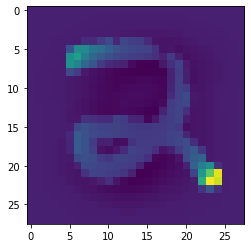

In [15]:
plt.imshow(X_train[0,:].reshape(28,28))
print(y_train[0])

In [16]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

#this is taking a lot of time to run because of the large dataset size and the complexity of the model

SVC(kernel='linear')

In [17]:
y_pred = model_linear.predict(X_test)

4 4


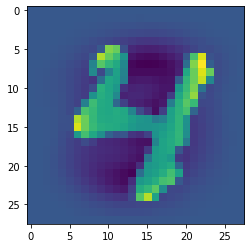

In [18]:
plt.imshow(X_test[10,:].reshape(28,28))
print(y_test[10],y_pred[10])

In [19]:
np.count_nonzero(y_pred!=y_test)

1648

### Q2
use sklearn.metrics to get accuracy score and confusion matrix 

In [20]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [21]:
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [22]:
# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# confusion matrix
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9645221201009572
Confusion matrix:
 [[2036    1    7    1    0    3   12    7    3    1]
 [   1 2330    5    3    5    1    3    8    5    2]
 [   5    8 2022    9   10    1    2   23   15    2]
 [   3    4   33 2032    2   24    2   19   17    6]
 [   0    4   19    1 1971    4   11   11    1   25]
 [   3    3   10   19    1 1809   21   17    8    3]
 [   7    5    6    0    6    8 2011   14    6    0]
 [   2   10   16    5   10    2    0 2123    3   17]
 [   2   13   16   15    4   22    5   13 1947   10]
 [   7    4    7   19   25    4    0   39    9 1973]]


### Q3
Use PCA from sklearn.decomposition to reduce dimensionality of feature space.
reduce to 256 features
and then train and do evaluation

In [23]:
from sklearn.decomposition import PCA

#use pca to reduce the dimensionality of the data to 256 features and then train the model and do evaluation
pca = PCA(n_components=256)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# confusion matrix
print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.9676651269108053
Confusion matrix:
 [[2039    1    6    1    1    3   10    6    3    1]
 [   1 2333    6    2    5    1    2    6    5    2]
 [   6    7 2027    8    9    0    2   22   14    2]
 [   3    3   31 2041    2   23    2   14   18    5]
 [   0    4   17    1 1978    4    8   10    1   24]
 [   3    2    6   19    0 1820   20   13    9    2]
 [   7    4    4    0    6    6 2017   13    6    0]
 [   1    9   14    4   10    2    0 2131    2   15]
 [   4   15   13   11    3   20    5   12 1956    8]
 [   7    4    6   18   25    5    0   34   10 1978]]
